<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Model_Diagnostics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Reading data
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [0]:
#df.isnull().sum()

In [0]:
# Getting rid of NaN values

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['BsmtQual'] = df['BsmtQual'].fillna('Nb')
df['BsmtCond'] = df['BsmtCond'].fillna('Nb')
df['BsmtExposure'] = df['BsmtExposure'].fillna('Nb')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('Nb')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('Nb')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['FireplaceQu'] = df['FireplaceQu'].fillna('Nf')
df['GarageType'] = df['GarageType'].fillna('Ng')
df['GarageType'] = df['GarageType'].fillna('Ng')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [6]:
# Encoding categorical columns

le = LabelEncoder()

le.fit(df['MSZoning'])
print(le.classes_)
mszoning = pd.Series(le.transform(df['MSZoning']))
df['MSZoning'] = mszoning

le.fit(df['Street'])
print(le.classes_)
street = pd.Series(le.transform(df['Street']))
df['Street'] = street

le.fit(df['LandContour'])
print(le.classes_)
landcont = pd.Series(le.transform(df['LandContour']))
df['LandContour'] = landcont

le.fit(df['Utilities'])
print(le.classes_)
uts = pd.Series(le.transform(df['Utilities']))
df['Utilities'] = uts

le.fit(df['LotConfig'])
print(le.classes_)
lotconf = pd.Series(le.transform(df['LotConfig']))
df['LotConfig'] = lotconf

le.fit(df['LandSlope'])
print(le.classes_)
landslo = pd.Series(le.transform(df['LandSlope']))
df['LandSlope'] = landslo

le.fit(df['Neighborhood'])
print(le.classes_)
neigh = pd.Series(le.transform(df['Neighborhood']))
df['Neighborhood'] = neigh

le.fit(df['Condition1'])
print(le.classes_)
cond1 = pd.Series(le.transform(df['Condition1']))
df['Condition1'] = cond1

le.fit(df['Condition2'])
print(le.classes_)
cond2 = pd.Series(le.transform(df['Condition2']))
df['Condition2'] = cond2

le.fit(df['BldgType'])
print(le.classes_)
bldgtype = pd.Series(le.transform(df['BldgType']))
df['BldgType'] = bldgtype

le.fit(df['HouseStyle'])
print(le.classes_)
housestyle = pd.Series(le.transform(df['HouseStyle']))
df['HouseStyle'] = housestyle

le.fit(df['RoofStyle'])
print(le.classes_)
roofstyle = pd.Series(le.transform(df['RoofStyle']))
df['RoofStyle'] = roofstyle

le.fit(df['RoofMatl'])
print(le.classes_)
roofmatl = pd.Series(le.transform(df['RoofMatl']))
df['RoofMatl'] = roofmatl

le.fit(df['Exterior1st'])
print(le.classes_)
exterior1 = pd.Series(le.transform(df['Exterior1st']))
df['Exterior1st'] = exterior1

le.fit(df['Exterior2nd'])
print(le.classes_)
exterior2 = pd.Series(le.transform(df['Exterior2nd']))
df['Exterior2nd'] = exterior2

le.fit(df['MasVnrType'])
print(le.classes_)
masvnrtype = pd.Series(le.transform(df['MasVnrType']))
df['MasVnrType'] = masvnrtype

le.fit(df['ExterQual'])
print(le.classes_)
exterqual = pd.Series(le.transform(df['ExterQual']))
df['ExterQual'] = exterqual

le.fit(df['ExterCond'])
print(le.classes_)
extercond = pd.Series(le.transform(df['ExterCond']))
df['ExterCond'] = extercond

le.fit(df['Foundation'])
print(le.classes_)
found = pd.Series(le.transform(df['Foundation']))
df['Foundation'] = found

le.fit(df['BsmtQual'])
print(le.classes_)
bsmtqual = pd.Series(le.transform(df['BsmtQual']))
df['BsmtQual'] = bsmtqual

le.fit(df['BsmtCond'])
print(le.classes_)
bsmtcond = pd.Series(le.transform(df['BsmtCond']))
df['BsmtCond'] = bsmtcond

le.fit(df['BsmtExposure'])
print(le.classes_)
bsmtexpo = pd.Series(le.transform(df['BsmtExposure']))
df['BsmtExposure'] = bsmtexpo

le.fit(df['BsmtFinType1'])
print(le.classes_)
bsmtfin1 = pd.Series(le.transform(df['BsmtFinType1']))
df['BsmtFinType1'] = bsmtfin1

le.fit(df['BsmtFinType2'])
print(le.classes_)
bsmtfin2 = pd.Series(le.transform(df['BsmtFinType2']))
df['BsmtFinType2'] = bsmtfin2

le.fit(df['Heating'])
print(le.classes_)
heating = pd.Series(le.transform(df['Heating']))
df['Heating'] = heating

le.fit(df['HeatingQC'])
print(le.classes_)
heatingqc = pd.Series(le.transform(df['HeatingQC']))
df['HeatingQC'] = heatingqc

le.fit(df['CentralAir'])
print(le.classes_)
centralair = pd.Series(le.transform(df['CentralAir']))
df['CentralAir'] = centralair

le.fit(df['Electrical'])
print(le.classes_)
electric = pd.Series(le.transform(df['Electrical']))
df['Electrical'] = electric

le.fit(df['KitchenQual'])
print(le.classes_)
kitchenqual = pd.Series(le.transform(df['KitchenQual']))
df['KitchenQual'] = kitchenqual

le.fit(df['Functional'])
print(le.classes_)
func = pd.Series(le.transform(df['Functional']))
df['Functional'] = func

le.fit(df['FireplaceQu'])
print(le.classes_)
fireplace = pd.Series(le.transform(df['FireplaceQu']))
df['FireplaceQu'] = fireplace

le.fit(df['GarageType'])
print(le.classes_)
gtype = pd.Series(le.transform(df['GarageType']))
df['GarageType'] = gtype

le.fit(df['PavedDrive'])
print(le.classes_)
paveddrive = pd.Series(le.transform(df['PavedDrive']))
df['PavedDrive'] = paveddrive

le.fit(df['SaleType'])
print(le.classes_)
saletype = pd.Series(le.transform(df['SaleType']))
df['SaleType'] = saletype

le.fit(df['SaleCondition'])
print(le.classes_)
salecond = pd.Series(le.transform(df['SaleCondition']))
df['SaleCondition'] = salecond

['C (all)' 'FV' 'RH' 'RL' 'RM']
['Grvl' 'Pave']
['Bnk' 'HLS' 'Low' 'Lvl']
['AllPub' 'NoSeWa']
['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
['Gtl' 'Mod' 'Sev']
['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']
['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNn']
['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']
['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl']
['Flat' 'Gable' 'Gambrel' 'Hip' 'Mansard' 'Shed']
['ClyTile' 'CompShg' 'Membran' 'Metal' 'Roll' 'Tar&Grv' 'WdShake'
 'WdShngl']
['AsbShng' 'AsphShn' 'BrkComm' 'BrkFace' 'CBlock' 'CemntBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Plywood' 'Stone' 'Stucco' 'VinylSd' 'Wd Sdng'
 'WdShing']
['AsbShng' 'AsphShn' 'Brk Cmn' 'BrkFace' 'CBlock' 'CmentBd' 'HdBoard'
 'ImS

In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
Alley             object
LotShape          object
LandContour        int64
Utilities          int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
Condition2         int64
BldgType           int64
HouseStyle         int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int64
RoofMatl           int64
Exterior1st        int64
Exterior2nd        int64
MasVnrType         int64
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
Foundation         int64
BsmtQual           int64
BsmtCond           int64
BsmtExposure       int64
BsmtFinType1       int64
BsmtFinSF1         int64
BsmtFinType2       int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int64


In [8]:
# Dropping columns I don't need
df = df.drop(['Id','GarageFinish','GarageQual','GarageCond','PoolQC','Fence', 'MiscFeature', 'Alley', 'LotShape'], axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,642,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [9]:
df.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.035900,-3.570559e-01,-0.139781,-0.024969,-0.002940,-2.284384e-02,0.075910,-0.025672,-0.005985,-0.024762,-0.042395,0.746063,0.397161,0.032628,-0.059316,0.027850,0.040581,-0.117817,-0.031336,-0.089159,-0.137229,-0.029850,0.022895,-0.017161,-0.003254,0.058126,-0.081702,-0.017905,-0.065218,0.006437,-0.069836,0.037025,-0.065649,-0.140759,-0.238518,0.048009,0.020760,-0.101774,0.051945,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.010129,0.040380,0.003711,-0.045569,0.050200,0.133138,0.080187,-0.040110,-0.098672,-0.059925,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,0.035900,1.000000,-1.063635e-01,-0.034452,0.087654,-0.017854,-1.192034e-03,-0.009895,-0.022055,-0.249679,-0.027874,0.044606,0.005690,-0.105315,-0.160099,0.186951,-0.308908,-0.174728,-0.000301,0.005133,-0.008558,0.006963,-0.028279,-0.066766,0.200536,-0.096041,-0.235174,0.160778,-0.011450,0.037108,0.026347,-0.049128,-0.034004,0.028086,-0.046749,-0.087834,0.056866,0.134279,-0.049523,-0.070818,-0.055614,-0.051481,0.011520,-0.082615,-0.018526,0.007193,-0.198290,-0.133876,-0.016471,0.049434,0.128976,-0.043200,-0.095722,-0.011349,-0.002491,0.141142,-0.264654,-0.157042,-0.189250,-0.100366,-0.009477,-0.154704,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.357056,-0.106363,1.000000e+00,0.306795,-0.037323,-0.075647,5.171411e-18,-0.181253,0.067608,0.084545,-0.008483,0.003214,-0.408564,0.031907,0.234196,-0.052820,0.117598,0.082746,0.153467,0.082026,0.074448,0.098756,-0.020220,0.179283,-0.183293,0.047951,0.098809,-0.139701,0.055936,-0.130047,-0.023136,0.215828,-0.017142,0.043340,0.122156,0.363358,-0.020815,-0.079975,0.068666,0.060213,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,-0.189082,0.320146,0.030250,0.235755,-0.016492,-0.255709,0.064324,0.269729,0.323663,0.089073,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,-0.030846,0.058464,0.334901
LotArea,-0.139781,-0.034452,3.067946e-01,1.000000,-0.197131,-0.149083,1.012318e-02,-0.121161,0.436868,0.044569,0.023846,0.022164,-0.205721,-0.033190,0.105806,-0.005636,0.014228,0.013788,0.077054,0.149837,0.004256,-0.003930,-0.008122,0.103960,-0.057275,0.015160,-0.011081,-0.061495,0.016715,-0.152436,-0.057081,0.214103,-0.056425,0.111170,-0.002618,0.260833,0.028158,0.004212,0.049755,0.043856,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,-0.057018,0.190015,-0.022317,0.271364,0.005323,-0.150162,-0.024812,0.154871,0.180403,0.015134,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
Street,-0.024969,0.087654,-3.732277e-02,-0.197131,1.000000,0.115995,1.681767e-03,0.013960,-0.179360,-0.011561,-0.071657,0.002039,-0.018243,0.023704,0.058823,0.042848,0.021137,0.065465,-0.019732,0.008081,0.002505,0.006166,0.010007,0.017326,0.049976,0.005874,0.035277,-0.030590,-0.020903,0.072561,-0.014746,-0.015643,0.058167,-0.038487,0.035229,0.005068,0.007904,-0.053995,0.069869,0.021324,0.005950,0.046983,0.007724,0.044121

In [10]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPo

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

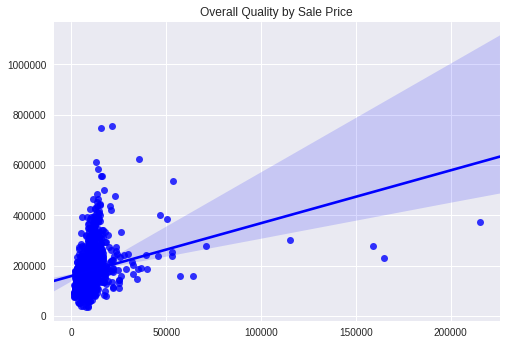

In [11]:
lotarea = df['LotArea'].values
saleprice = df['SalePrice'].values

fig = sns.regplot(lotarea, saleprice, color='blue').set_title('Overall Quality by Sale Price')


## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [12]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,642,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [23]:
# Setting X variables and y variable, and using Statsmodels to run regression and summary
X = df[['LotArea','OverallQual', 'ExterQual','1stFlrSF', '2ndFlrSF','LandContour']]

y = df['SalePrice']

# Adding ones vector to X
X = sm.add_constant(X)

# Fitting model
model = sm.OLS(y, X).fit()

# Getting predictions with model
predictions = model.predict(X) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     1043.
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:47:14   Log-Likelihood:                -15359.
No. Observations:                1309   AIC:                         3.073e+04
Df Residuals:                    1302   BIC:                         3.077e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.737e+04   9644.095     -1.801      

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

In [0]:
# A very low p-value (<.05) tells us that a coefficient is statistically significant (i.e. meaningfully affects the y variable)

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [15]:
# Removing outliers

print(df.shape)

df = df[(np.abs(stats.zscore(df)) < 5).all(axis=1)]

print(df.shape)

(1460, 72)
(1309, 72)


In [24]:
# Running regression without outliers

X = df[['LotArea','OverallQual', 'ExterQual','1stFlrSF', '2ndFlrSF','LandContour']]

y = df['SalePrice']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     1043.
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:47:23   Log-Likelihood:                -15359.
No. Observations:                1309   AIC:                         3.073e+04
Df Residuals:                    1302   BIC:                         3.077e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.737e+04   9644.095     -1.801      

In [0]:
# I would say there was a significant change in most coeficients. Some p-values fluctuated as well

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [0]:
# Creating log price column
df['ln_price'] = np.log(df['SalePrice'])

In [25]:
# Running regression with log price

X = df[['LotArea','OverallQual', 'ExterQual','1stFlrSF', '2ndFlrSF','LandContour']]

y = df['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

# R^2 went down

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     963.4
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:47:31   Log-Likelihood:                 520.63
No. Observations:                1309   AIC:                            -1027.
Df Residuals:                    1302   BIC:                            -991.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.6756      0.052    205.337      

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

# Only the const is greater than 10

Index(['const', 'LotArea', 'OverallQual', 'ExterQual', '1stFlrSF', '2ndFlrSF',
       'LandContour'],
      dtype='object') 


[133.16759199192384, 1.251559496349304, 2.402116144307493, 1.8136776702812825, 1.9709779888512808, 1.5285849758010108, 1.0111119555361845]


## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [22]:
no_const = X.drop('const', axis=1)
no_const.corr()

# The two variables with the highest VIFs (ExterQual and OverallQual) are indeed highly correlated (-66%)

,LotArea,OverallQual,ExterQual,1stFlrSF,2ndFlrSF
LotArea,1.000000,0.159831,-0.117124,0.347622,0.132870
OverallQual,0.159831,1.000000,-0.664149,0.457498,0.277503
ExterQual,-0.117124,-0.664149,1.000000,-0.373367,-0.127375
1stFlrSF,0.347622,0.457498,-0.373367,1.000000,-0.278899
2ndFlrSF,0.132870,0.277503,-0.127375,-0.278899,1.000000


## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [0]:
# I had no high VIF variables

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [47]:
# Calculating robust standard errors
X = df[['LotArea','OverallQual', 'ExterQual','1stFlrSF', '2ndFlrSF','LandContour']]

y = df['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary() # The "cov_type='HC3'" parameter will show us robust std errors
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     926.5
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:36:11   Log-Likelihood:                 520.63
No. Observations:                1309   AIC:                            -1027.
Df Residuals:                    1302   BIC:                            -991.0
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.6756      0.064    166.725      

In [0]:
# Standard error got really big for OverallQual and ExterQual but made others really small

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

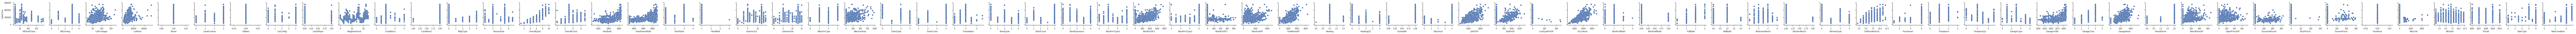

In [31]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop(['SalePrice', 'ln_price'])

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df, y_vars=['SalePrice'], x_vars=x_columns)

In [0]:
# Looks like OveralQual might be a good candidate for a polynomial regressor

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


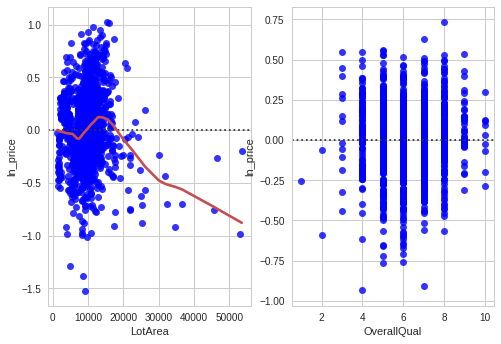

In [40]:
y = df['ln_price']
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2)
sns.residplot(X['LotArea'], y, lowess=True, color="r", ax=axs[0], scatter_kws={'color':'blue'})
sns.residplot(X['OverallQual'], y, lowess=True, color="r", ax=axs[1], scatter_kws={'color':'blue'});

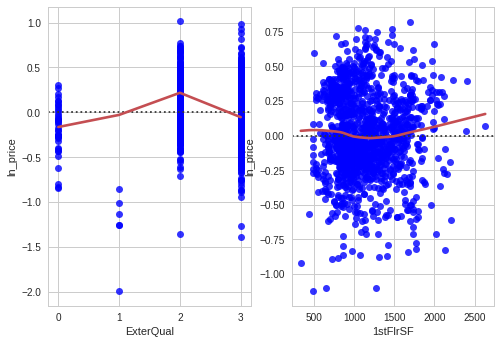

In [41]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2)
sns.residplot(X['ExterQual'], y, lowess=True, color="r", ax=axs[0], scatter_kws={'color':'blue'})
sns.residplot(X['1stFlrSF'], y, lowess=True, color="r", ax=axs[1], scatter_kws={'color':'blue'});

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


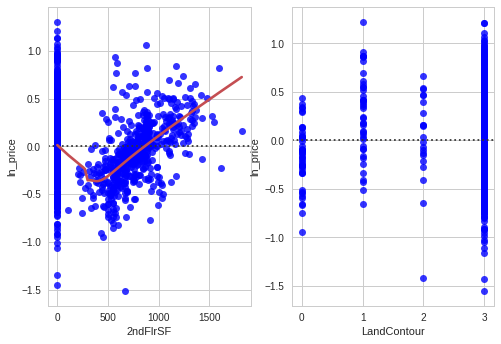

In [42]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2)
sns.residplot(X['2ndFlrSF'], y, lowess=True, color="r", ax=axs[0], scatter_kws={'color':'blue'})
sns.residplot(X['LandContour'], y, lowess=True, color="r", ax=axs[1], scatter_kws={'color':'blue'});

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [0]:
# Making new columns for X variables that could be polynomial
df['LotArea_squared'] = df['LotArea'] ** 2
df['ExterQual_squared'] = df['ExterQual'] ** 2
df['1stFlrSF_squared'] = df['1stFlrSF'] ** 2
df['2ndFlrSF_squared'] = df['2ndFlrSF'] ** 2

In [48]:
# Adding LotArea squared
X = df[['LotArea','OverallQual', 'ExterQual','1stFlrSF', '2ndFlrSF','LandContour','LotArea_squared']]

y = df['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary() # The "cov_type='HC3'" parameter will show us robust std errors
print(print_model)

# R^2 went up a little so i'll keep LotArea_squared

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     819.6
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:37:27   Log-Likelihood:                 526.53
No. Observations:                1309   AIC:                            -1037.
Df Residuals:                    1301   BIC:                            -995.7
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.6636      0.064    1

In [49]:
# Adding ExterQual_squared
X = df[['LotArea','OverallQual', 'ExterQual','1stFlrSF', '2ndFlrSF','LandContour','LotArea_squared',
        'ExterQual_squared']]

y = df['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary() # The "cov_type='HC3'" parameter will show us robust std errors
print(print_model)

# R^2 went up more so i'll keep ExterQual_squared

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     762.2
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:39:39   Log-Likelihood:                 538.43
No. Observations:                1309   AIC:                            -1059.
Df Residuals:                    1300   BIC:                            -1012.
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.6255      0.06

In [50]:
# Adding 1stFlrSF_squared
X = df[['LotArea','OverallQual', 'ExterQual','1stFlrSF', '2ndFlrSF','LandContour','LotArea_squared',
        'ExterQual_squared', '1stFlrSF_squared']]

y = df['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary() # The "cov_type='HC3'" parameter will show us robust std errors
print(print_model)

# 1stFlrSF_squared made ExterQual p-value go up, so not sure how to interpret that

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     688.9
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:41:10   Log-Likelihood:                 545.73
No. Observations:                1309   AIC:                            -1071.
Df Residuals:                    1299   BIC:                            -1020.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.4953      0.07

In [51]:
# Adding 2ndFlrSF_squared
X = df[['LotArea','OverallQual', 'ExterQual','1stFlrSF', '2ndFlrSF','LandContour','LotArea_squared',
        'ExterQual_squared', '1stFlrSF_squared', '2ndFlrSF_squared']]

y = df['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary() # The "cov_type='HC3'" parameter will show us robust std errors
print(print_model)

# 2ndFlrSF_squared seemed to help the model

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     628.9
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:42:57   Log-Likelihood:                 550.69
No. Observations:                1309   AIC:                            -1079.
Df Residuals:                    1298   BIC:                            -1022.
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.5339      0.08

In [55]:
# Removing variables that don't have significant p-values (LandContour & ExterQual)

X = df[['LotArea','OverallQual','1stFlrSF', '2ndFlrSF','LotArea_squared',
        'ExterQual_squared', '1stFlrSF_squared', '2ndFlrSF_squared']]

y = df['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary() # The "cov_type='HC3'" parameter will show us robust std errors
print(print_model)

# Not a ton changed.

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     770.9
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:46:40   Log-Likelihood:                 548.95
No. Observations:                1309   AIC:                            -1080.
Df Residuals:                    1300   BIC:                            -1033.
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.5793      0.07

In [0]:
# This is a slightly better model in terms of R^2 than the original. I'm not sure if I understand how
# to interpret the coefficients, especially with the log price. Also, the Jarque-Bera is still very large.

# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other Diagnostic tests. Can you show that residuals are normally distributed graphically?
- Study for the sprint challenge!
- Write a blog post about iferential modeling using linear regression.